<a href="https://colab.research.google.com/github/Hf301/Hf301/blob/main/Regression%26Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Регрессия

Датасет diamonds.csv

В нем представлены характеристики бриллиантов и их цены с сайта jamesallen (B2C площадка) с 2022-07-01

**Описание полей**


* fluor - флуорисценуия (свойство камня светиться в лучах ультр)
* symmetry - показатель симметричности
* platform - название платформы, где был размещен камень
* quality_group - составной показатель из cut polish symmetry
* size_group - каратно весовая группа
* big_size_group - каратно-весовая группа
* shape - форма
* color - цвет
* clarity - чистота
* cut - качество огранки (может быть только у круглых камней)
* polish - полировка
* id - номер камня
* date - дата
* price - цена
* carat - кол-во карат
* tablepercent - размер площадки по отношению ширине
* price_per_carat - цена за карат
* z - длина (diameter)
* x - ширина
* depth_perc - отношение высоты к ширине
* y - высота



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Школа DS 12 KT/diamonds.csv',index_col=0)

In [ ]:
df = df.replace({'NONE':None,'NO':None,'No':None,'EX':3,'VG':2,'G':1,'FNT':3,'MED':2,'STG':1,
                 'FL':9,"IF":8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1,
                 'D':9,'E':8,'F':7,'H':6,'I':5,'J':4,'K':3,'L':2,'M':1,
                 'RD':10,'EM':9,'OV':8,'CUSH':7,'PS':6,'HS':5,'EM SQ':4,'MQ':3,'PR':2,'RAD':1})
df = df.fillna(0)
df = df.drop(['platform'], axis=1)

In [ ]:
df = df.drop_duplicates(keep='last')

In [ ]:
df = df.dropna()

In [ ]:
pd.isnull(df).any()

fluor              False
symmetry           False
shape              False
color              False
clarity            False
cut                False
polish             False
id                 False
date               False
price              False
carat              False
price_per_carat    False
z                  False
x                  False
depth_perc         False
y                  False
dtype: bool

In [ ]:
df['id'] = df['id'].astype(float)
df['date'] = df['date'].astype(float)

In [ ]:
df

,fluor,symmetry,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
135269,0.0,3.0,6.0,7.0,3.0,0.0,3.0,13870838.0,202206.0,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
48477,2.0,3.0,10.0,6.0,6.0,3.0,3.0,11725253.0,202207.0,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
236786,0.0,3.0,9.0,6.0,8.0,0.0,3.0,14444347.0,202205.0,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
235781,0.0,3.0,10.0,8.0,4.0,3.0,3.0,14438434.0,202207.0,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
277744,0.0,2.0,10.0,7.0,5.0,2.0,3.0,14615276.0,202206.0,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0.0,3.0,10.0,9.0,4.0,3.0,3.0,7535786.0,202207.0,8700.0,0.97,8969.07,6.36,6.32,62.2,3.93104
282754,0.0,3.0,10.0,9.0,4.0,3.0,3.0,14631732.0,202206.0,6650.0,0.90,7388.89,6.13,6.18,61.7,3.81306
141550,0.0,3.0,10.0,4.0,2.0,3.0,3.0,13932645.0,202205.0,11570.0,1.52,7611.84,7.36,7.39,61.0,4.50790
71237,1.0,3.0,10.0,1.0,5.0,3.0,3.0,12699310.0,202207.0,8220.0,1.09,7541.28,6.55,6.60,62.0,4.09200


Необходимо предсказать `price_per_carat`

### Очистка

In [ ]:
id_stat = df.groupby(by='id')['carat'].count().to_frame()

In [ ]:
id_stat = id_stat.reset_index(level=['id'])
id_stat

,id,carat
0,0.0,1
1,19423.0,3
2,19449.0,2
3,19476.0,1
4,19501.0,3
...,...,...
162273,15418480.0,1
162274,15418482.0,1
162275,15418486.0,1
162276,15418493.0,1


In [ ]:
id_stat = id_stat.astype(float)

In [ ]:
df = df.merge(id_stat)

In [ ]:
df_one = df.query('carat == 1')  # те камни, которые встречались один раз
df_three = df.query('carat == 2 or carat == 3') # те камни, которые встречались 2 или 3 раза
stat = df_three.groupby('id')['id','date','price','carat','price_per_carat','z','x','depth_perc','y'].agg(np.std)
stat = stat.query('depth_perc>0')
stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,date,price,carat,price_per_carat,z,x,depth_perc,y
id,,,,,,,,
19737.0,1.414214,657.609307,0.0,328.804653,0.0,0.0,0.636396,0.041684
21003.0,1.000000,1420.281662,0.0,473.427221,0.0,0.0,0.288675,0.026645
21160.0,1.000000,1166.247544,0.0,388.747257,0.0,0.0,0.519615,0.040842
21454.0,0.707107,0.000000,0.0,0.000000,0.0,0.0,0.282843,0.024296
22062.0,0.707107,0.000000,0.0,0.000000,0.0,0.0,0.070711,0.004787
...,...,...,...,...,...,...,...,...
14879174.0,0.707107,3351.686143,0.0,1675.843071,0.0,0.0,0.070711,0.005664
14879255.0,0.707107,480.832611,0.0,240.416306,0.0,0.0,0.353553,0.027895
14879336.0,0.707107,311.126984,0.0,155.563492,0.0,0.0,0.424264,0.033771


In [ ]:
# Удаляем аномальные наблюдения
df_three = df_three.query('carat == 2 or carat == 3').sort_values(by=['id','date'])
df_three = df_three.groupby('id').agg('max').reset_index() #тепреь в качестве цены возьмем последнее значение по времени
df = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты
df

,fluor,symmetry,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,0.0,3.0,10.0,1.0,3.0,3.0,3.0,14773748.0,202206.0,7170.0,1.0,7170.0,6.30,6.35,63.7,4.04495
1,2.0,3.0,8.0,6.0,4.0,0.0,3.0,15281430.0,202207.0,5160.0,1.0,5160.0,7.43,5.64,64.6,3.64344
2,1.0,3.0,10.0,4.0,5.0,3.0,2.0,14694262.0,202205.0,4990.0,1.0,4990.0,6.41,6.46,61.0,3.94060
3,0.0,1.0,10.0,6.0,2.0,1.0,3.0,14677153.0,202206.0,3900.0,1.0,3900.0,6.14,6.22,64.9,4.03678
4,3.0,3.0,10.0,7.0,4.0,3.0,3.0,14121372.0,202205.0,8440.0,1.0,8440.0,6.37,6.40,62.0,3.96800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,0.0,3.0,10.0,5.0,2.0,2.0,3.0,15151071.0,202207.0,14570.0,2.0,7285.0,7.86,7.91,63.8,5.04658
26213,1.0,3.0,5.0,8.0,4.0,0.0,3.0,15155065.0,202207.0,18120.0,2.0,9060.0,7.55,8.92,53.1,4.73652
26214,0.0,3.0,10.0,5.0,6.0,3.0,3.0,15155109.0,202207.0,26750.0,2.0,13375.0,7.95,8.00,63.3,5.06400
26215,0.0,3.0,7.0,6.0,2.0,2.0,3.0,15155131.0,202207.0,12380.0,2.0,6190.0,7.77,6.73,67.9,4.56967


In [ ]:
categories = ['carat'] #определите по каким группам отпределять инфляцию (к примеру можно добавить каратную группу)
df_index = df.groupby(['date'] + categories)[['price_per_carat']]\
             .mean()\
             .reset_index() # индекс цен
date_max = df_index.date.max()
df_index = df_index.merge(df_index.query('date == @date_max')[categories + ['price_per_carat']]\
                          .rename(columns={'price_per_carat': 'price_per_carat_max'}), 
                          on=categories, how='outer') # сопоставляем группы с максимальной датой
df_index['inflation'] = df_index['price_per_carat_max'] / df_index.price_per_carat # вычисляем инфляцию
df_with_inf = df.merge(df_index[['date'] + categories + ['inflation']], 
                        on=['date'] + categories, how='left') # соединяем все в одной таблиц
df_with_inf

,fluor,symmetry,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,inflation
0,0.0,3.0,10.0,1.0,3.0,3.0,3.0,14773748.0,202206.0,7170.0,1.0,7170.0,6.30,6.35,63.7,4.04495,1.049138
1,2.0,3.0,8.0,6.0,4.0,0.0,3.0,15281430.0,202207.0,5160.0,1.0,5160.0,7.43,5.64,64.6,3.64344,1.000000
2,1.0,3.0,10.0,4.0,5.0,3.0,2.0,14694262.0,202205.0,4990.0,1.0,4990.0,6.41,6.46,61.0,3.94060,1.068722
3,0.0,1.0,10.0,6.0,2.0,1.0,3.0,14677153.0,202206.0,3900.0,1.0,3900.0,6.14,6.22,64.9,4.03678,1.049138
4,3.0,3.0,10.0,7.0,4.0,3.0,3.0,14121372.0,202205.0,8440.0,1.0,8440.0,6.37,6.40,62.0,3.96800,1.068722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,0.0,3.0,10.0,5.0,2.0,2.0,3.0,15151071.0,202207.0,14570.0,2.0,7285.0,7.86,7.91,63.8,5.04658,1.000000
26213,1.0,3.0,5.0,8.0,4.0,0.0,3.0,15155065.0,202207.0,18120.0,2.0,9060.0,7.55,8.92,53.1,4.73652,1.000000
26214,0.0,3.0,10.0,5.0,6.0,3.0,3.0,15155109.0,202207.0,26750.0,2.0,13375.0,7.95,8.00,63.3,5.06400,1.000000
26215,0.0,3.0,7.0,6.0,2.0,2.0,3.0,15155131.0,202207.0,12380.0,2.0,6190.0,7.77,6.73,67.9,4.56967,1.000000


### Модель

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df.corr()

,fluor,symmetry,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
fluor,1.000000,0.032587,0.028911,0.007030,0.006294,-0.018148,-0.006038,-0.040663,-0.001894,-0.050686,0.023771,-0.091903,0.066524,0.024368,-0.061952,-0.013296
symmetry,0.032587,1.000000,0.177582,0.011187,0.102681,0.373170,0.318872,0.098602,0.011815,0.204635,0.024770,0.288581,-0.062025,0.219075,-0.176633,0.146839
shape,0.028911,0.177582,1.000000,-0.015955,-0.008350,0.493866,0.102604,0.079765,0.019143,0.211434,-0.034488,0.335776,-0.080037,0.495215,-0.532979,0.264491
color,0.007030,0.011187,-0.015955,1.000000,0.044437,-0.036201,0.023329,-0.036990,0.007155,0.174699,-0.005504,0.252564,0.028720,-0.026172,-0.000773,-0.033756
clarity,0.006294,0.102681,-0.008350,0.044437,1.000000,0.034842,0.125656,-0.005574,-0.015774,0.337427,-0.003126,0.485101,-0.098464,-0.066462,0.101530,-0.015507
cut,-0.018148,0.373170,0.493866,-0.036201,0.034842,1.000000,0.201884,0.071867,0.012491,0.249596,-0.041626,0.393694,-0.486187,0.561960,-0.183618,0.591996
polish,-0.006038,0.318872,0.102604,0.023329,0.125656,0.201884,1.000000,0.134087,-0.010571,0.116834,0.003223,0.171936,-0.080828,0.102682,-0.032652,0.107043
id,-0.040663,0.098602,0.079765,-0.036990,-0.005574,0.071867,0.134087,1.000000,0.190120,-0.018482,-0.079239,0.036797,-0.002843,0.027667,-0.057967,-0.005509
date,-0.001894,0.011815,0.019143,0.007155,-0.015774,0.012491,-0.010571,0.190120,1.000000,0.129291,0.131367,0.100782,0.073506,0.088176,0.011528,0.123451
price,-0.050686,0.204635,0.211434,0.174699,0.337427,0.249596,0.116834,-0.018482,0.129291,1.000000,0.697185,0.868931,0.214121,0.511556,-0.172447,0.529429


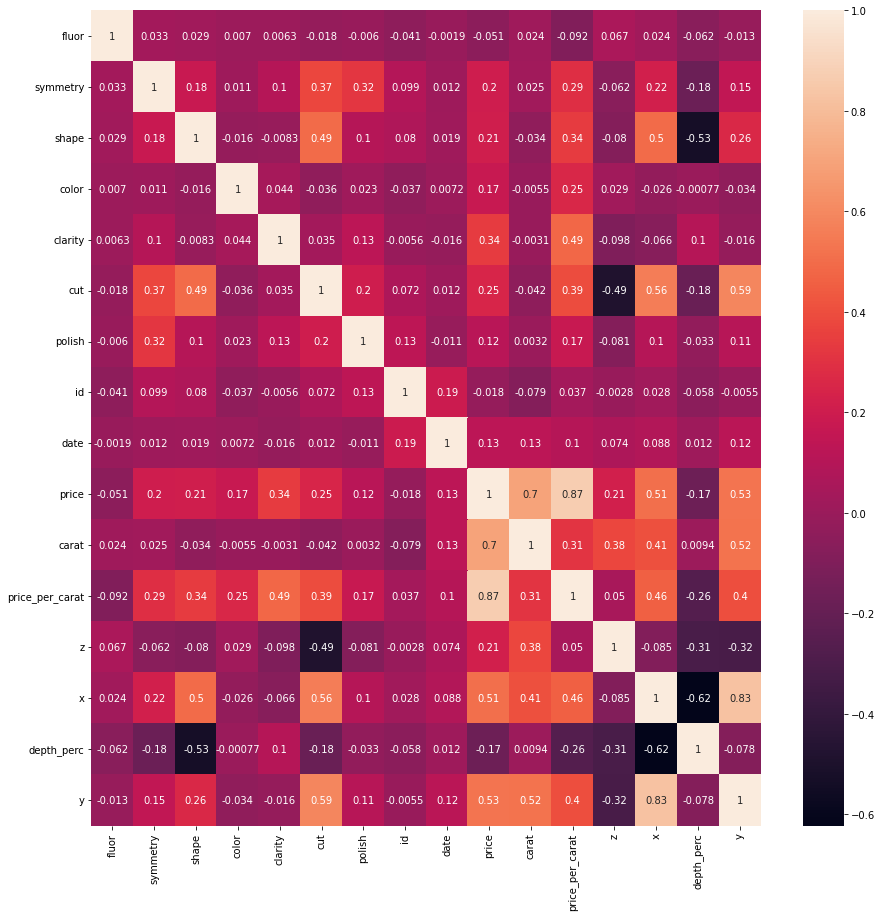

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10})
sns.set_style('white')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['price'])
y = df['price']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Valid data r-squared: ', regr.score(X_valid,y_valid))
pd.DataFrame(regr.coef_, index=X_train.columns, columns=['coef'])

Training:  0.9565156651991353
Valid:  0.9590989659030115


,coef
fluor,34.384872
symmetry,-77.270595
shape,-15.668144
color,-25.077193
clarity,-82.426315
cut,-67.089608
polish,-15.402317
id,-0.000009
date,-30.547983
carat,9918.955891


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
lr=LinearRegression(normalize=True)
y = df["price"]
X = df.drop(columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
st = StandardScaler()
X_train_std = st.fit_transform(X_train)
X_test_std = st.transform(X_test)
lr.fit(X_train, y_train)
coeffecients = pd.DataFrame(lr.coef_,X_train.columns)
coeffecients.round(3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


,0
fluor,34.385
symmetry,-77.271
shape,-15.668
color,-25.077
clarity,-82.426
cut,-67.090
polish,-15.402
id,-0.000
date,-30.548
carat,9918.956


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_percentage_error
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
y_pred_lin = lin_model.predict(X_test)
def metrics(y_pred,y_true):
    print("MSE  is " + str(mean_squared_error(y_pred,y_true)))
    print('MAPE  is ' + str(mean_absolute_percentage_error(y_pred, y_true)))
    print("R2   is " + str(r2_score(y_pred,y_true)))
    print("RMSE is " + str(np.sqrt(mean_squared_error(y_pred,y_true))))
metrics(y_pred_lin, y_test)

MSE  is 602024.7130776581
MAPE  is 0.048105439349257685
R2   is 0.9570634627568539
RMSE is 775.9025151896712


In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 864 kB/s 


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Classroom/Школа DS 12 KT/diamonds.csv',index_col=0)
df2 = df2.replace({'NONE' : 'no', 'No' : "no"})
df2.drop(['x','y','z'],axis=1, inplace=True)
df2.price = df2.price[df2.price>0]
df2.price_per_carat = df2.price_per_carat[df2.price_per_carat>0]
df2.clarity = df2.clarity.fillna("no")
df2.symmetry = df2.symmetry.fillna('no')
df2.polish = df2.polish.fillna('no')
df2.fluor = df2.fluor.fillna('no') 
df2.cut = df2.cut.fillna('no')
df2 = df2.dropna()
df2=df2.drop_duplicates(keep='last')
id_stat = df2.groupby(by='id')['carat'].count().to_frame()
df_one = df2.query('carat==1') 
df_three = df2.query('carat==2 or carat==3')
stat = df_three.groupby('id')['id','date','price','carat','price_per_carat','depth_perc'].agg(np.std) 
stat = stat.dropna()
stat = stat.query('depth_perc>0')
for i in stat.index:
  df_three = df_three.drop(df_three[df_three['id']==i].index)
df_three = df_three.groupby('id').agg('max').reset_index() 
df2 = pd.concat([df_one, df_three]).reset_index(drop=True)
df2['price_1000']=np.log2(df2["price"]-1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from typing import Tuple, List


def OHE(df: pd.DataFrame, columns: List[str]) -> Tuple[pd.DataFrame, List[str]]:
    """
    Вместо это функции можно использовать и функционал pandas
    """
    index = df.index
    one = OneHotEncoder(sparse=False, categories='auto')
    ohe = one.fit_transform(df[columns])
    col_names = one.get_feature_names(input_features = columns)
    df = df.drop(columns, axis=1)
    df = df.reset_index(drop=True)
    df = pd.concat([df, pd.DataFrame(ohe, columns=col_names)], axis = 1)
    df = df.set_index(index)
    return (df, col_names)

scaler = StandardScaler()

cols = ['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish']
df_ohe = OHE(df2, cols)[0]

X = df_ohe.drop(columns=['price_1000','price', 'price_per_carat'])
y = df_ohe['price_1000']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13 )

lin_model_o = LinearRegression()
lin_model_o = lin_model_o.fit(X_train,y_train)
y_pred_lin = lin_model_o.predict(X_test)

print("MSE OHE " + str(mean_squared_error(y_test, y_pred_lin)))
print("MAPE OHE " + str(mean_absolute_percentage_error(y_test, y_pred_lin)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


MSE OHE 0.05535352215634335
MAPE OHE 0.014013445866841459


Сравниваем работу выбранной линейной модели с KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
model_knn = KNeighborsRegressor(3)
model_knn.fit(X_train, y_train)
y_pred_train_KNN = model_knn.predict(X_train)
y_pred_test_KNN  = model_knn.predict(X_test)
def metrics(y_pred_train_KNN,y_pred_test_KNN):
  print("MSE " + str(mean_squared_error(y_test, y_pred_test_KNN)))
  print("MAPE " + str(mean_absolute_percentage_error(y_train, y_pred_train_KNN)))
metrics(y_pred_train_KNN, y_pred_test_KNN)

MSE 0.7378894804687915
MAPE 0.03229613318378652


## Классификация

Датасет bodyPerformance

Описание:

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Школа DS 12 KT/bodyPerformance.csv')

In [ ]:
df = df.replace({'M':1, 'F':0})
df2 = pd.get_dummies(df, columns=df.select_dtypes(object).columns,drop_first=False)

### Определение гендера

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_percentage_error
X = df2.drop(columns=['gender'])
y = df2['gender']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13, stratify = y)
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_test_LR = model_LR.predict(X_valid)
print((y_pred_test_LR == y_valid).sum() / len(y_valid))
print("MSE  is " + str(mean_squared_error(y_pred_test_LR,y_valid)))
print('MAPE  is ' + str(mean_absolute_percentage_error(y_pred_test_LR, y_valid))) # !?!
print("R2   is " + str(r2_score(y_pred_test_LR,y_valid)))
print("RMSE is " + str(np.sqrt(mean_squared_error(y_pred_test_LR,y_valid))))

0.9880552444942142
MSE  is 0.011944755505785741
MAE  is 18491823777930.375
R2   is 0.9484001444564825
RMSE is 0.10929206515472997


### Определение класса

In [ ]:
X = df.drop(columns=['class']) # укажите новый таргет
y = df['class']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_valid)

In [ ]:
lr = LogisticRegression(C=100, random_state=0, max_iter=1000)
lr.fit(X_train_std, y_train)
y_pred_test_LR = lr.predict(X_test_std)
print(sum(y_pred_test_LR != y_valid))
print((y_pred_test_LR == y_valid).sum() / len(y_valid))

1029
0.6159014557670772


In [ ]:
model_knn = KNeighborsClassifier(3)
model_knn.fit(X_train, y_train)

y_pred_train_KNN = model_knn.predict(X_train)
y_pred_test_KNN  = model_knn.predict(X_valid)
print(sum(y_pred_test_KNN != y_valid))
print('TEST: '+ str(accuracy_score(y_valid, y_pred_test_KNN)))
print('TRAIN: '+ str(accuracy_score(y_train, y_pred_train_KNN)))

1218
TEST: 0.5453527435610303
TRAIN: 0.7426731379503454
